### Importing Necessary libraries

In [218]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Data Preparation

In [219]:
df = pd.read_csv('data.csv') # Reading the data
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


From the dataset we can see that data has some inconsistency. Specially categorical data. So we need to perform some actions like replacing spaces with '_'(underscores) and making them all lowercase.

# Making the data consistent

In [220]:
df.columns = df.columns.str.lower().str.replace(' ', '_') # Making all the heading consistent looking

categorical = list(df.dtypes[df.dtypes == 'object'].index) # listing all the categorical column heading for further looping

# Looping to make all the categorical column consistent looking
for col in categorical:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Exploratory Data Analysis

In [262]:
print("Total number of rows: ",len(df)) # Checking the length of the dataset
print()

#Checking unique values in whole dataset
for col in df.columns:
    print(f"Name of the column: {col},  Number of unique values: {df[col].nunique()}")
    # print(df[col].unique()[:5])

Total number of rows:  11914

Name of the column: make,  Number of unique values: 48
Name of the column: model,  Number of unique values: 914
Name of the column: year,  Number of unique values: 28
Name of the column: engine_fuel_type,  Number of unique values: 10
Name of the column: engine_hp,  Number of unique values: 356
Name of the column: engine_cylinders,  Number of unique values: 9
Name of the column: transmission_type,  Number of unique values: 5
Name of the column: driven_wheels,  Number of unique values: 4
Name of the column: number_of_doors,  Number of unique values: 3
Name of the column: market_category,  Number of unique values: 71
Name of the column: vehicle_size,  Number of unique values: 3
Name of the column: vehicle_style,  Number of unique values: 16
Name of the column: highway_mpg,  Number of unique values: 59
Name of the column: city_mpg,  Number of unique values: 69
Name of the column: popularity,  Number of unique values: 48
Name of the column: msrp,  Number of uni

In [222]:
# Checking null values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

There are some missing or null values in dataset. Where two of them are categorical and others are numerical. So, we can perform some actions for numerical data to fill those null values.

In [223]:
# # Filling up the null numerical values
missing_numerical = list(df.dtypes[df.dtypes == 'float64'].index)
# # missing_numerical

for col in missing_numerical:
    df[col].fillna(float(math.ceil(df[col].mean())),inplace=True)

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp               0
engine_cylinders        0
transmission_type       0
driven_wheels           0
number_of_doors         0
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

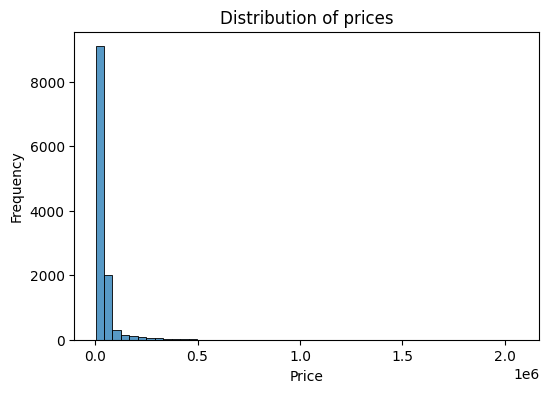

In [224]:
# Distribution of the prices at a larger scale
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

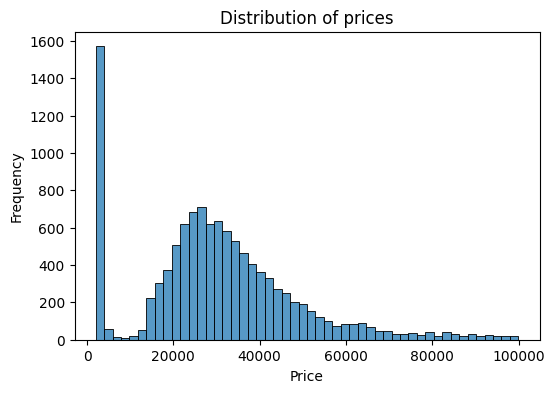

In [225]:
# Distribution of the prices at a smaller scale
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

As we can see from the plot that our data is not normally distributed, As we are modeling for regression data should be normally distributed, otherwise our model can be biased.So, our next step is transformation.

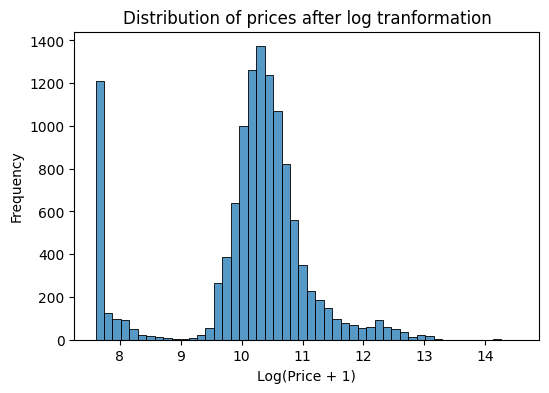

In [226]:
# Log transformation
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

### Validation framework
Generally we choose to split our dataset into two parts, one is training and one is for testing. But here we steped up a little. In general way there is no way to validate my result so here we will splipt our dataset into three parts and one part will be for validation.

In [227]:
# Splitting the dataset for validation
np.random.seed(2)

n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_test + n_val)

idx = np.arange(n) # Arranging the index.
np.random.shuffle(idx) 

df_shuffled = df.iloc[idx]

df_train_org = df_shuffled.iloc[:n_train]
df_val_org = df_shuffled.iloc[n_train:n_train+n_val]
df_test_org = df_shuffled.iloc[n_train+n_val:]

# Reindexing the datasets so that it can be consistant
df_train = df_train_org.reset_index(drop=True).copy()
df_val = df_val_org.reset_index(drop=True).copy()
df_test = df_test_org.reset_index(drop=True).copy()

# Getting the msrp values
y_train_org = df_train.msrp.values
y_val_org = df_val.msrp.values
y_test_org = df_test.msrp.values

# Storing the values of msrp with log transformation
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

# Droping the msrp from the splitted dataset as they are stored in our target dataset
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

Here in the code we have shuffled our dataset as our dataset was sorted. Hence if we didn't shuffle we would have ended up with patterns in splitted datasets. That would have left biases.

### Linear regression
Setting up a linear regression model.

In [228]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### Baseline solution

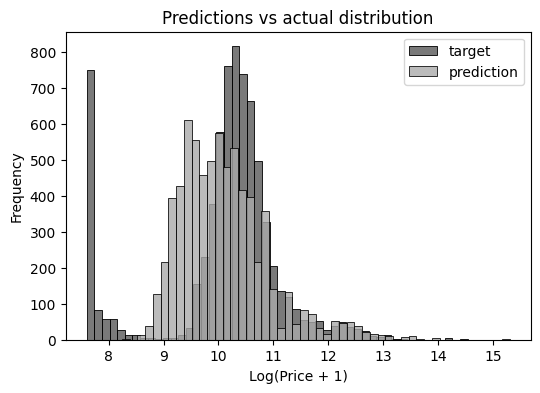

In [229]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=50)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=50)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

Baseline Solution is provided for comparing the result. We can use this predictions to measure the baseline's performance (e.g., accuracy)-- this metric will be base for comparing any other machine learning algorithm against.

#### Root Mean Square Error

In [230]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)
rmse(y_train, y_pred)

0.7575076688179981

In [231]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7504279717385053

### Simple Feature Engineering

In [232]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [233]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.5117294180465813
validation 0.5069646573378314


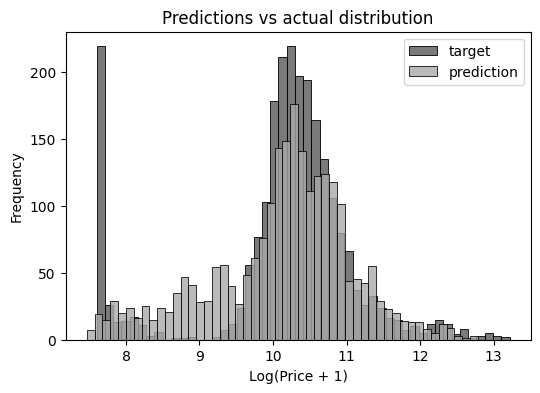

In [234]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=50)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=50)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [235]:
df['make'].value_counts().head()

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [236]:
df['engine_fuel_type'].value_counts().head()

regular_unleaded                  7172
premium_unleaded_(required)       2009
premium_unleaded_(recommended)    1523
flex-fuel_(unleaded/e85)           899
diesel                             154
Name: engine_fuel_type, dtype: int64

In [237]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [238]:
df['driven_wheels'].value_counts()

front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64

In [239]:
df['market_category'].value_counts().head()

crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: market_category, dtype: int64

In [240]:
df['vehicle_size'].value_counts()

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [241]:
df['vehicle_style'].value_counts().head()

sedan            3048
4dr_suv          2488
coupe            1211
convertible       793
4dr_hatchback     702
Name: vehicle_style, dtype: int64

In [242]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [243]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 111.12967130209469
validation: 104.50177389123165


In [244]:
w_0

8461964954287902.0

### Regularization

In [245]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [246]:
X_train = prepare_X(df_train)

for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, 8461964954287902.00, 2.44, -8161549483361474.00
0.001, 5.25, -0.10, 1.33
 0.01, 5.25, -0.10, 1.33
  0.1, 5.23, -0.10, 1.33
    1, 5.04, -0.10, 1.28
   10, 4.15, -0.09, 1.03


In [247]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 111.12967130209469
val 104.50177389123165


In [248]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.46298921147303174
val 0.45766658619580103


In [249]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4576560604727127
0.0001 0.4576560274869914
 0.001 0.45765698754901996
  0.01 0.45766658619580103
   0.1 0.4577638296548383
     1 0.4588258483353316
     5 0.46394544496016543
    10 0.47000090323775456


In [250]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.45766658619580103
test: 0.4546438090253246


### Using the model

In [260]:
i = 2
one_car = df_test.iloc[i].to_dict()
actual_price = y_test_org[i]
one_car

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [261]:
X_test = prepare_X(pd.DataFrame([one_car]))[0]
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)

print(f"This is the actual price of the car: {actual_price},  whereas this is the predicted price: {math.ceil(suggestion)}")

This is the actual price of the car: 31120,  whereas this is the predicted price: 28553


As we see after all the feature engineering and tuning the dataset, outcome is pretty satisfying. Differece is just a couple of thousand dolar.